In [3]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#setting up the dataframe
hotel_reservations = pd.read_csv(r"C:\Cellula\first project\first inten project.csv")
hotel_reservations.columns = hotel_reservations.columns.str.replace(' ', '_')
hotel_reservations.columns = hotel_reservations.columns.str.replace('price_', 'price')
#the date 2018-2-29 does not exist on the calendar so it was replaced with 2018-2-28
hotel_reservations['date_of_reservation'] = hotel_reservations['date_of_reservation'].str.replace('2018-2-29', '2/28/2018') 
hotel_reservations['date_of_reservation'] = pd.to_datetime(hotel_reservations['date_of_reservation'])
hotel_reservations['total_nights'] = hotel_reservations.iloc[:, 3:5].sum(axis= 1)

In [7]:
#checking for nulls and duplicates
print(sum(hotel_reservations.duplicated(subset= 'Booking_ID')))
print(hotel_reservations.isnull().sum())

0
Booking_ID                  0
number_of_adults            0
number_of_children          0
number_of_weekend_nights    0
number_of_week_nights       0
type_of_meal                0
car_parking_space           0
room_type                   0
lead_time                   0
market_segment_type         0
repeated                    0
P-C                         0
P-not-C                     0
average_price               0
special_requests            0
date_of_reservation         0
booking_status              0
total_nights                0
dtype: int64


       average price  car parking space  lead time  number of adults  \
0              88.00                  0        224                 1   
1             106.68                  0          5                 1   
2              50.00                  0          1                 2   
3             100.00                  0        211                 1   
4              77.00                  0         48                 1   
...              ...                ...        ...               ...   
36280         115.00                  0        346                 2   
36281         107.55                  0         34                 2   
36282         105.61                  0         83                 2   
36283          96.90                  0        121                 3   
36284         133.44                  0         44                 2   

       number of children  number of week nights  number of weekend nights  \
0                       1                      5         

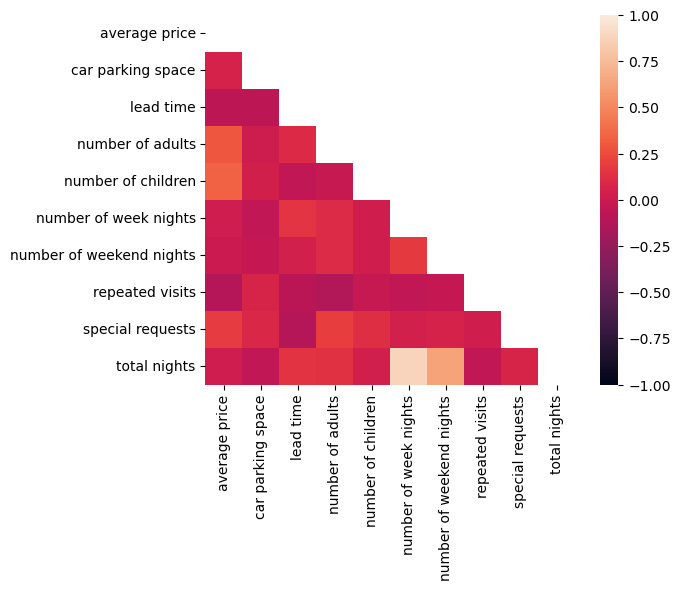

In [9]:
#correlation heatmap for numerical categories
num_cat= hotel_reservations.select_dtypes(include=['number'])
num_cat.columns = num_cat.columns.str.replace('_', ' ')
num_cat_heatmap = num_cat
num_cat_heatmap.columns = num_cat.columns.str.replace('P-not-C', 'repeated visits')
num_cat_heatmap = num_cat_heatmap[num_cat_heatmap.columns.difference(['repeated','P-C'])]
print(num_cat_heatmap)
sns.heatmap(num_cat_heatmap.corr(), vmin= -1, vmax= 1,square= True, mask= np.triu(np.ones_like(num_cat_heatmap.corr(), dtype= 'bool')))
plt.show()

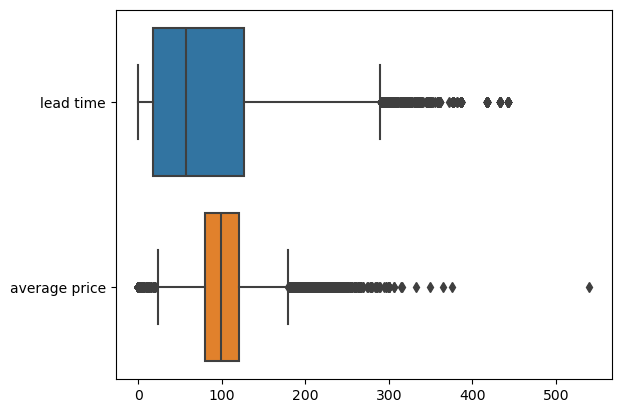

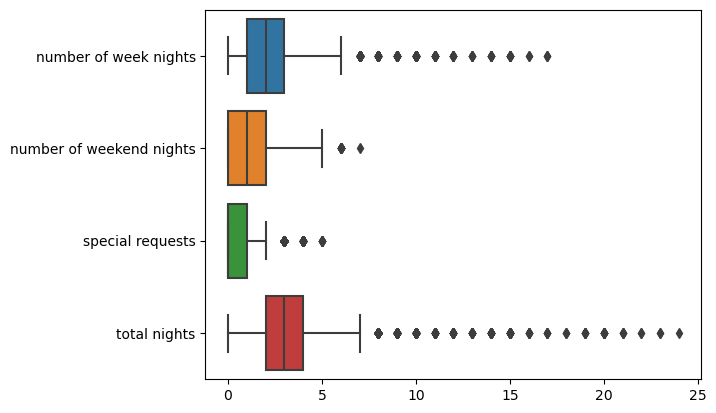

In [11]:
#box plots for numerical categories
sns.boxplot(data= num_cat[['lead time', 'average price']], orient= 'h')
plt.show()
sns.boxplot(data= num_cat[['number of week nights', 'number of weekend nights', 'special requests', 'total nights']], orient= 'h')
plt.show()

In [13]:
#market segment analysis
hs_market_analysis = hotel_reservations.groupby('market_segment_type').agg( 
    canceled = ('booking_status', lambda x: (x=='Canceled').sum()),
    special_request_bookings = ('special_requests', lambda x: (x >= 1).sum()),
    no_of_repeated_visits = ('P-not-C', 'sum'),
    prefered_meal = ('type_of_meal', lambda x: x.mode()),
    prefered_room = ('room_type', lambda x: x.mode()),
    revenue = ('average_price', 'sum'),
    lead_time = ('lead_time', 'mean'),
    average_stay = ('total_nights', 'mean'),
    parking_req_bookings = ('car_parking_space', lambda x: (x >= 1).sum()),
    total_bookings = ('Booking_ID', 'count'),
    average_price = ('average_price', 'mean')
)
hs_market_analysis['canceled_per'] = round(hs_market_analysis['canceled'] / hs_market_analysis['total_bookings'], 3)*100
hs_market_analysis['request_per'] = round(hs_market_analysis['special_request_bookings'] / hs_market_analysis['total_bookings'], 3)*100
hs_market_analysis['parking_req_per'] = round(hs_market_analysis['parking_req_bookings'] / hs_market_analysis['total_bookings'], 3)*100
hs_market_analysis.to_csv('hs_market_analysis.csv')
segment_color = ['blue', 'orange', 'green', 'red', 'purple']
print(hs_market_analysis)

                     canceled  special_request_bookings  \
market_segment_type                                       
Aviation                   37                         0   
Complementary               0                       224   
Corporate                 220                       404   
Offline                  3154                      1909   
Online                   8478                     13968   

                     no_of_repeated_visits prefered_meal prefered_room  \
market_segment_type                                                      
Aviation                                26   Meal Plan 1   Room_Type 4   
Complementary                          968   Meal Plan 1   Room_Type 1   
Corporate                             4176   Meal Plan 1   Room_Type 1   
Offline                                114   Meal Plan 1   Room_Type 1   
Online                                 281   Meal Plan 1   Room_Type 1   

                        revenue   lead_time  average_stay  \
market

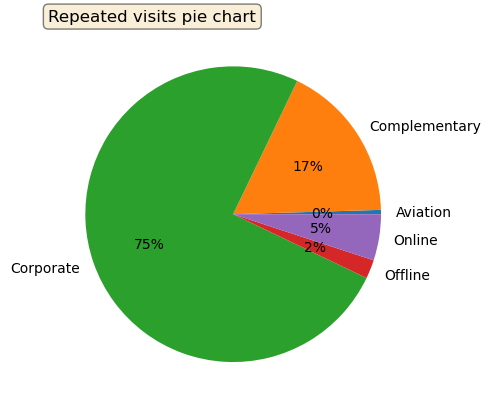

In [15]:
#Repeated visits pie chart
plt.pie(hs_market_analysis['no_of_repeated_visits'], autopct= '%1.0f%%', labels = hs_market_analysis.index)
plt.title('Repeated visits pie chart', loc= 'left', bbox= dict(boxstyle= 'round', facecolor= 'wheat', alpha= 0.5))
plt.show()

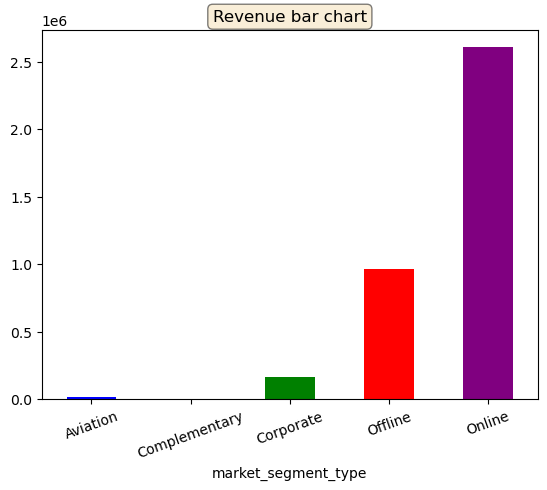

In [17]:
#revenue bar chart
hs_market_analysis['revenue'].plot.bar(rot=20, color= segment_color)
plt.title('Revenue bar chart', bbox= dict(boxstyle= 'round', facecolor= 'wheat', alpha= 0.5))
plt.show()

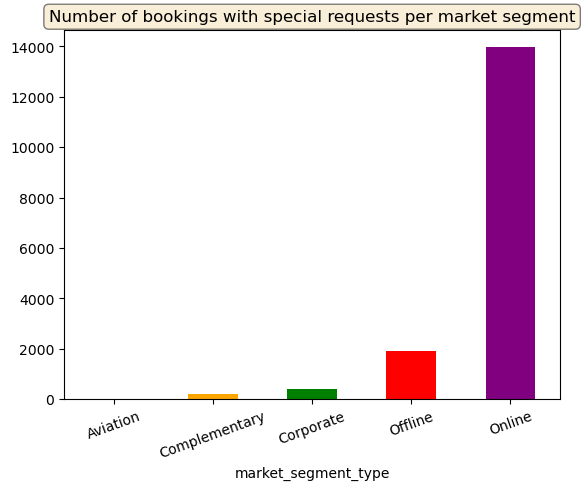

In [21]:
#Number of bookings with special requests per market segment
hs_market_analysis['special_request_bookings'].plot.bar(rot=20, color= segment_color)
plt.title('Number of bookings with special requests per market segment', bbox= dict(boxstyle= 'round', facecolor= 'wheat', alpha= 0.5))
plt.show()

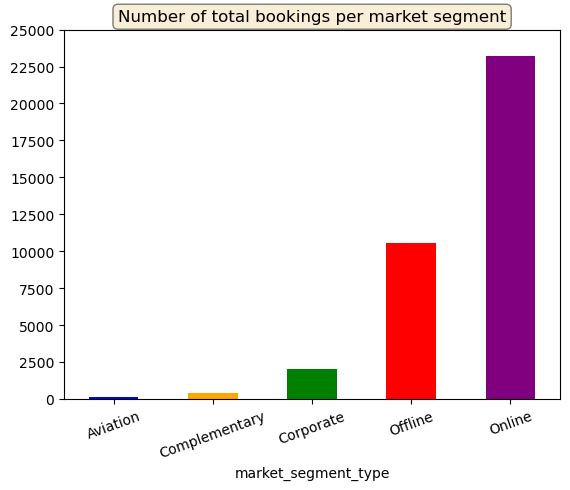

In [20]:
#Number of total bookings
hs_market_analysis['total_bookings'].plot.bar(rot= 20, color= segment_color).set(yticks= np.arange(0,27500,2500))
plt.title('Number of total bookings per market segment', bbox= dict(boxstyle= 'round', facecolor= 'wheat', alpha= 0.5))
plt.show()

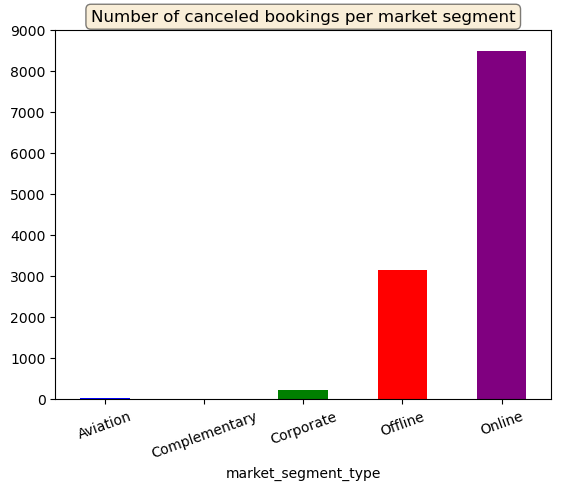

In [23]:
#Number of canceled bookings
hs_market_analysis['canceled'].plot.bar(rot= 20, color= segment_color).set(yticks= np.arange(0,10000,1000))
plt.title('Number of canceled bookings per market segment', bbox= dict(boxstyle= 'round', facecolor= 'wheat', alpha= 0.5))
plt.show()

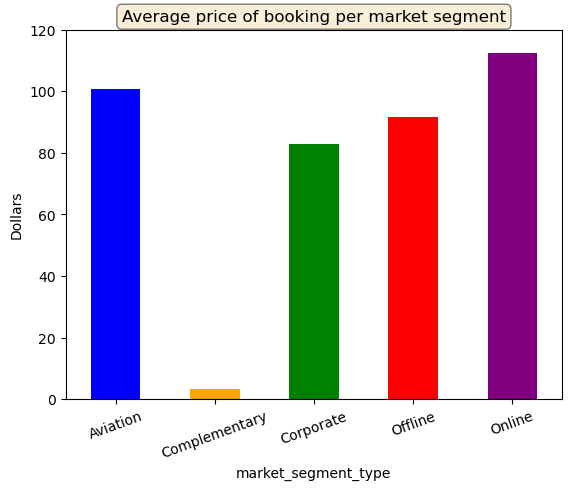

In [24]:
#Average price of booking per market segment
hs_market_analysis['average_price'].plot.bar(rot=20, color= segment_color).set(ylabel= 'Dollars', yticks= np.arange(0,140,20))
plt.title('Average price of booking per market segment', bbox= dict(boxstyle= 'round', facecolor= 'wheat', alpha= 0.5))
plt.show()

In [26]:
#Number of adults analysis
hs_adults = hotel_reservations.groupby('number_of_adults').agg(
    canceled = ('booking_status', lambda x: (x=='Canceled').sum()),
    lead_time = ('lead_time', 'mean'),
    total_bookings = ('Booking_ID', 'count')
)
hs_adults['cancelation_per'] = round(hs_adults['canceled'] / hs_adults['total_bookings'], 3)*100
hs_adults.to_csv('hs_adults.csv')
print(hs_adults)

                  canceled  lead_time  total_bookings  cancelation_per
number_of_adults                                                      
0                       44  98.352518             139             31.7
1                     1859  63.446897            7702             24.1
2                     9120  91.852777           26110             34.9
3                      863  82.644953            2318             37.2
4                        3  46.375000              16             18.8


In [28]:
#Number of children analysis
hs_children = hotel_reservations.groupby('number_of_children').agg(
    canceled = ('booking_status', lambda x: (x=='Canceled').sum()),
    lead_time = ('lead_time', 'mean'),
    total_bookings = ('Booking_ID', 'count')
)
hs_children['cancelation_per'] = round(hs_children['canceled'] / hs_children['total_bookings'], 3)*100
hs_children.to_csv('hs_children.csv')
print(hs_children)

                    canceled  lead_time  total_bookings  cancelation_per
number_of_children                                                      
0                      10885  86.361314           33583             32.4
1                        541  74.050555            1622             33.4
2                        457  67.430057            1058             43.2
3                          5  60.473684              19             26.3
9                          1   9.500000               2             50.0
10                         0  37.000000               1              0.0


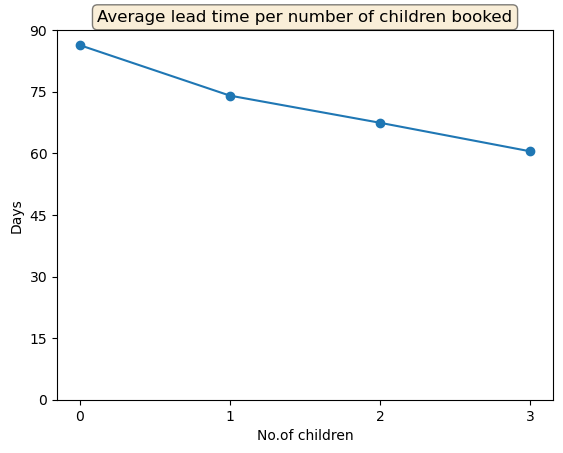

In [30]:
#Average lead time per number of children booked line plot
#to exclude extreme ouliers
hs_children.iloc[:4, 1].plot.line(marker='o').set(xticks= np.arange(0,4,1), yticks= np.arange(0,95,15), xlabel= 'No.of children',
                                                            ylabel= 'Days')
plt.title('Average lead time per number of children booked', bbox= dict(boxstyle= 'round', facecolor= 'wheat', alpha= 0.5))
plt.show()

Average lead time is 85


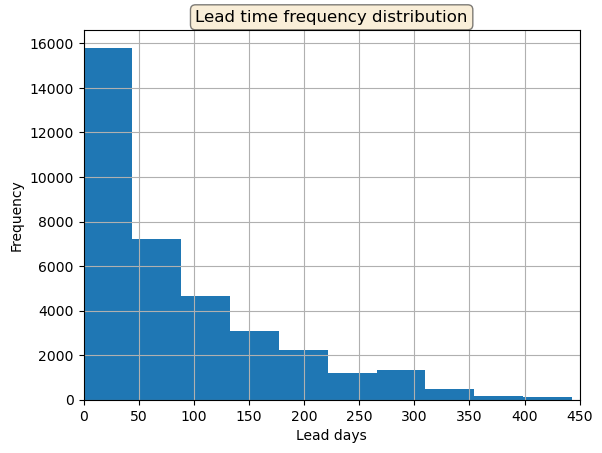

In [36]:
#lead time analysis
print('Average lead time is', round(hotel_reservations.iloc[:, 8].mean()))
hist= hotel_reservations.iloc[:, 8].hist().set(xlim= (0,450), xlabel= 'Lead days', ylabel= 'Frequency')
plt.title('Lead time frequency distribution', bbox= dict(boxstyle= 'round', facecolor= 'wheat', alpha= 0.5))
plt.show()

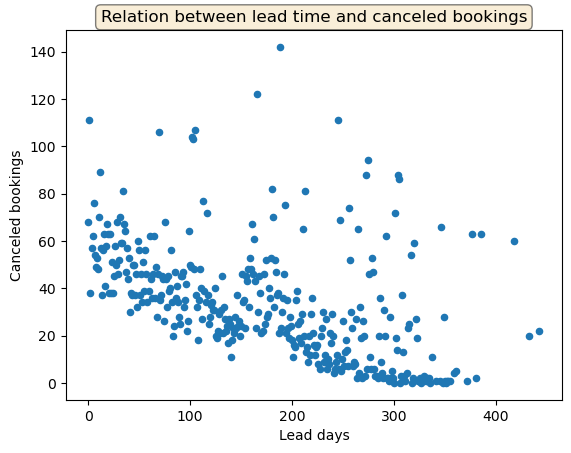

In [38]:
#Relation between lead time and canceled bookings scatter plot
hs_lead_time = hotel_reservations.groupby('lead_time').agg(canceled = ('booking_status', lambda x: (x=='Canceled').sum()))
hs_lead_time_frame = pd.DataFrame(hs_lead_time).reset_index()
hs_lead_time_frame.plot.scatter(x= 'lead_time', y= 'canceled').set(xlabel= 'Lead days', ylabel= 'Canceled bookings')
plt.title('Relation between lead time and canceled bookings', bbox= dict(boxstyle= 'round', facecolor= 'wheat', alpha= 0.5))
plt.show()

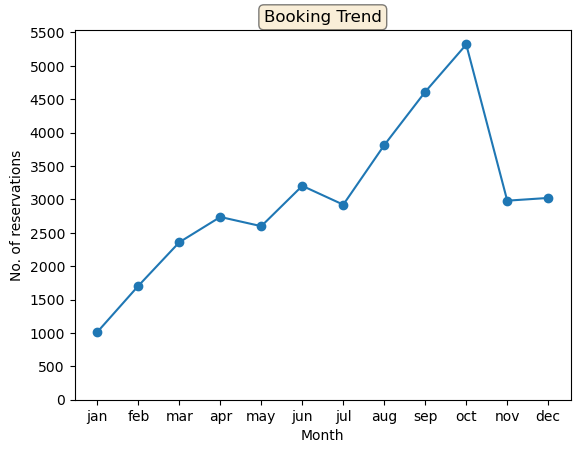

In [40]:
#date analysis
hs_date= hotel_reservations.groupby(hotel_reservations['date_of_reservation'].dt.month)['Booking_ID'].count()
hs_date.index = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
hs_date.to_csv('hs_date.csv')
hs_date.plot(marker='o').set(xticks= range(12), xticklabels= hs_date.index, xlabel= 'Month', yticks= np.arange(0, 6000, 500), 
                                ylabel= 'No. of reservations')
plt.title('Booking Trend', bbox= dict(boxstyle= 'round', facecolor= 'wheat', alpha= 0.5))
plt.show()